In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('C:/Users/SKM/Desktop/2nd Sem/ADS Final/master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,Albania1987,NaN,"2,15,66,24,900",796.000000,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,Albania1987,NaN,"2,15,66,24,900",796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,Albania1987,NaN,"2,15,66,24,900",796.000000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation


In [3]:
dfnn=pd.read_csv('C:/Users/SKM/Desktop/2nd Sem/ADS Final/newcleaned.csv')

## ----------Data Cleaning and Preprocessing--------------

In [4]:
df.drop(['country-year','HDI for year'],inplace=True,axis=1)

In [5]:
#Encoding Values
df['sex'].replace('male',0,inplace=True)
df['sex'].replace('female',1,inplace=True)

In [6]:
numeric = {'5-14 years': 0, '15-24 years': 1, '25-34 years': 2, '35-54 years' : 3,'55-74 years': 4,'75+ years' : 5}

In [7]:
df['age_group'] = df['age'].replace(numeric)

In [8]:
df.drop('age',inplace=True,axis=1)

In [9]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [10]:
gen={'Generation X':0, 'Silent':1, 'G.I. Generation':2, 'Boomers':3,
       'Millenials':4, 'Generation Z':5}

In [11]:
df['generation'].replace(gen,inplace=True)

In [12]:
#Check the percentage of missing values
missing_values = df.isna().sum()
percent_missing = (missing_values / len(df)) * 100
print(percent_missing)

country               0.000000
year                  0.000000
sex                   0.000000
suicides_no           3.778813
population            0.000000
suicides/100k pop     0.000000
 gdp_for_year ($)     0.000000
gdp_per_capita ($)    0.000000
generation            0.000000
age_group             0.000000
dtype: float64


In [13]:
#Drop Null Values
df.dropna(inplace=True)

In [14]:
df.isna().sum()

country               0
year                  0
sex                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
age_group             0
dtype: int64

In [15]:
df.replace("Republic of Korea", "Korea, Republic of", inplace = True)
df.replace('Czech Republic', "Czechia", inplace = True)
df.replace('Macau', 'Macao', inplace = True)
df.replace('Saint Vincent and Grenadines', "Saint Vincent and the Grenadines", inplace = True)
df.replace('China, Hong Kong SAR', 'China', inplace = True)

In [16]:
import pycountry_convert as pc
continent =[]
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
for i in df['country']:
    continent.append(country_to_continent(i))
con=pd.DataFrame(continent)


In [17]:
con.shape

(30556, 1)

In [18]:
ndf=pd.concat([dfnn,con],axis=1)

In [19]:
ndf

,Unnamed: 0,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,age_group,0
0,0,Albania,1987,0,21.0,312900,6.710000,"2,15,66,24,900",796.000000,0,1,Europe
1,1,Albania,1987,0,16.0,308000,5.190000,"2,15,66,24,900",796.000000,1,3,Europe
2,2,Albania,1987,1,14.0,289700,4.830000,"2,15,66,24,900",796.000000,0,1,Europe
3,3,Albania,1987,0,1.0,21800,4.590000,"2,15,66,24,900",796.000000,2,5,Europe
4,4,Albania,1987,0,9.0,274300,3.280000,"2,15,66,24,900",796.000000,3,2,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
30551,31751,Ukraine,2017,1,256.0,44831135,0.571032,1.12E+11,2638.326055,2,5,Europe
30552,31752,United Kingdom,2017,1,104.0,66058859,0.157435,2.70E+12,40857.755580,2,5,Europe
30553,31753,United States of America,2017,1,501.0,325122128,0.154096,1.95E+13,60109.655730,2,5,North America
30554,31754,Uruguay,2017,1,14.0,3422200,0.409094,64233966861,18690.893840,2,5,South America


In [20]:
ndf.drop('Unnamed: 0',axis=1)

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,age_group,0
0,Albania,1987,0,21.0,312900,6.710000,"2,15,66,24,900",796.000000,0,1,Europe
1,Albania,1987,0,16.0,308000,5.190000,"2,15,66,24,900",796.000000,1,3,Europe
2,Albania,1987,1,14.0,289700,4.830000,"2,15,66,24,900",796.000000,0,1,Europe
3,Albania,1987,0,1.0,21800,4.590000,"2,15,66,24,900",796.000000,2,5,Europe
4,Albania,1987,0,9.0,274300,3.280000,"2,15,66,24,900",796.000000,3,2,Europe
...,...,...,...,...,...,...,...,...,...,...,...
30551,Ukraine,2017,1,256.0,44831135,0.571032,1.12E+11,2638.326055,2,5,Europe
30552,United Kingdom,2017,1,104.0,66058859,0.157435,2.70E+12,40857.755580,2,5,Europe
30553,United States of America,2017,1,501.0,325122128,0.154096,1.95E+13,60109.655730,2,5,North America
30554,Uruguay,2017,1,14.0,3422200,0.409094,64233966861,18690.893840,2,5,South America


In [21]:
ndf.rename({0:'continent'}, axis=1, inplace = True)

In [22]:
ndf['continent'].unique()

array(['Europe', 'North America', 'South America', 'Asia', 'Oceania',
       'Africa'], dtype=object)

## -------------Exploratory Data Analysis (EDA)---------------------

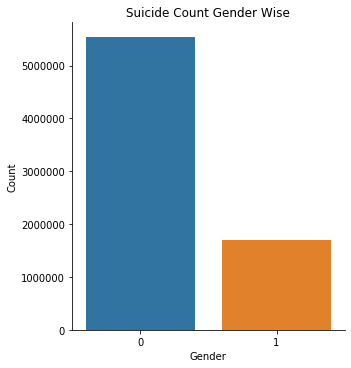

In [23]:
gender_counts = df.groupby('sex')['suicides_no'].sum().reset_index()
sns.catplot(data=gender_counts, x='sex', y='suicides_no', kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Suicide Count Gender Wise')
plt.show()

<Figure size 1440x720 with 0 Axes>

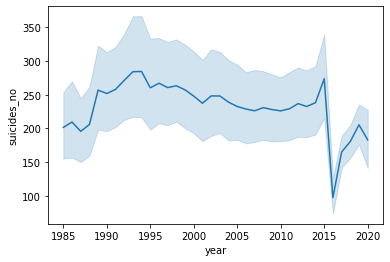

<Figure size 1440x720 with 0 Axes>

In [24]:
sns.lineplot(x='year',y='suicides_no',data=df)
plt.figure(figsize=(20,10))

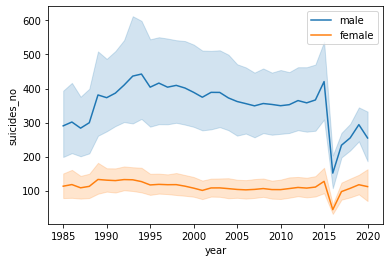

In [25]:
df_men = df[df['sex']== 0]
df_women = df[df['sex']== 1]
sns.lineplot(x=df_men.year, y='suicides_no',data=df)
sns.lineplot(x=df_women.year, y='suicides_no',data=df)
plt.legend(["male", 'female'])

In [26]:
df['suicides/100k pop'].mean()

12.176806410943877

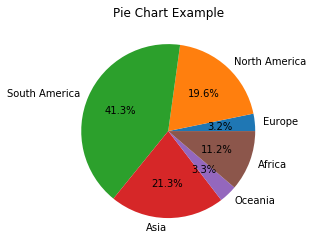

In [27]:
a=ndf.groupby('continent').count()
fig, ax = plt.subplots()
ax.pie(a['country'], labels=['Europe', 'North America', 'South America', 'Asia', 'Oceania',
       'Africa'], autopct='%1.1f%%')
ax.set_title('Pie Chart Example')
plt.show()

In [28]:
x = df.groupby('country')

In [29]:
x['suicides/100k pop'].mean().values

array([3.50287879e+00, 5.33154762e-01, 9.59906424e+00, 2.93883240e+00,
       9.50309524e+00, 1.15904543e+01, 2.12287783e+01, 1.85541667e+00,
       1.24739130e+00, 1.85412698e+00, 2.97043333e+00, 2.97358879e+01,
       2.00286754e+01, 6.23062500e+00, 4.61708333e+00, 5.36444492e+00,
       2.04896786e-01, 1.77861043e+01, 1.11533333e+01, 1.13919567e+01,
       9.95360638e+00, 5.01355458e-03, 4.96730688e+00, 6.32717574e+00,
       2.10228248e+01, 1.89875019e+01, 2.93285758e+00, 1.62202613e+01,
       1.29925098e+01, 0.00000000e+00, 5.29161913e-01, 5.64869133e+00,
       6.02474711e-03, 9.75608034e+00, 2.31203395e+01, 5.10500000e+00,
       2.07480882e+01, 2.16756944e+01, 3.65241728e+00, 1.35891372e+01,
       3.74315963e+00, 1.98151792e+00, 2.84517862e+00, 2.21864000e+01,
       2.94957407e+01, 1.14719118e+01, 1.04588932e+01, 8.43343017e+00,
       8.26921471e+00, 5.21764706e-01, 1.97466001e+01, 1.04905198e-02,
       2.65893841e+01, 6.65537879e+00, 4.72190052e+01, 1.07551616e+00,
      

In [30]:
G7_countries = ['Canada','France','Germany','Italy','Japan','United Kingdom','United States of America']

In [33]:
G7 = ndf[ndf['country'].isin(G7_countries)]

In [34]:
G7['suicides/100k pop'].mean()

13.237520161355869

C:\Users\SKM\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


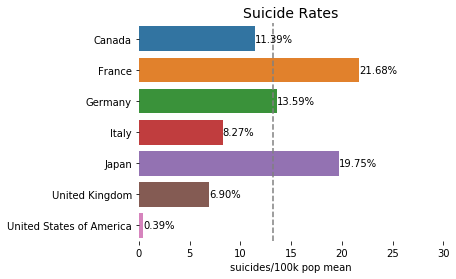

In [35]:
G7['suicides/100k pop mean'] = G7.groupby('country')['suicides/100k pop'].transform('mean')
plt.figure(figsize=(12,4))
plt.subplot(122)
ax = sns.barplot(data = G7, x = 'suicides/100k pop mean', y='country')
plt.title('Suicide Rates', fontsize=14)
plt.xlim([0,30])
plt.ylabel("")
plt.box(False)
plt.axvline(x= G7['suicides/100k pop mean'].mean(), color = 'gray', ls = '--')
for p in ax.patches:
    ax.annotate("{:,.2f}%".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.4), ha='left', va='center')    
plt.show()


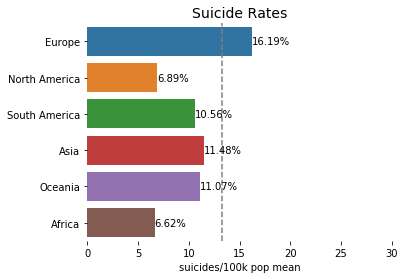

In [36]:
ndf['suicides/100k pop mean'] = ndf.groupby('continent')['suicides/100k pop'].transform('mean')
plt.figure(figsize=(12,4))
plt.subplot(122)
ax = sns.barplot(data = ndf, x = 'suicides/100k pop mean', y='continent')
plt.title('Suicide Rates', fontsize=14)
plt.xlim([0,30])
plt.ylabel("")
plt.box(False)
plt.axvline(x= G7['suicides/100k pop mean'].mean(), color = 'gray', ls = '--')
for p in ax.patches:
    ax.annotate("{:,.2f}%".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.4), ha='left', va='center')    
plt.show()


In [37]:
cont_list = ndf['continent'].unique()

In [38]:
male = ndf['sex'] == 0
female = ndf['sex'] == 1

C:\Users\SKM\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  # This is added back by InteractiveShellApp.init_path()


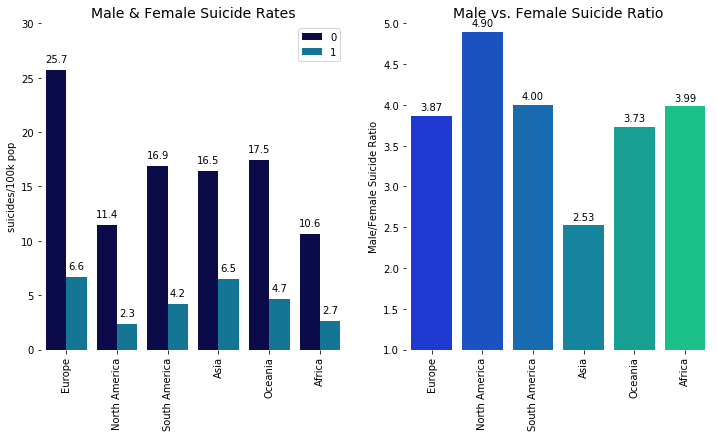

In [39]:
for i, row in ndf.iterrows():
    c = ndf.loc[i]['continent']
    ndf.loc[i, 'male'] = ndf['suicides/100k pop'][(ndf['continent'] == c) & (ndf['sex'] == 0)].mean()
    ndf.loc[i, 'female'] = ndf['suicides/100k pop'][(ndf['continent'] == c) & (ndf['sex'] == 1)].mean()


ndf['ratio'] = ndf['male'] / ndf['female'] 

plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.barplot(data = ndf, x = 'continent', order = cont_list, y = 'suicides/100k pop', hue = 'sex', ci=None, palette = 'ocean')
plt.title('Male & Female Suicide Rates', fontsize=14)
plt.xlabel("")
plt.xticks(rotation = 90)
plt.ylim([0,30])
plt.legend(title = "")
plt.box(False)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()+1), ha='center', va='center')

plt.subplot(122)
ax = sns.barplot(x=ndf['continent'], y=ndf['ratio'], palette = 'winter')
plt.title('Male vs. Female Suicide Ratio', fontsize=14)
plt.xlabel("")
plt.xticks(rotation = 90)
plt.ylabel('Male/Female Suicide Ratio')
plt.ylim([1,5])
plt.box(False)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()+.1), ha='center', va='center')

plt.show()

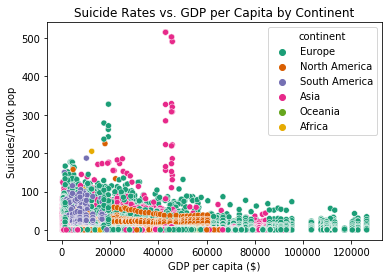

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
#Scatter plot
sns.scatterplot(data=ndf, x='gdp_per_capita ($)', y='suicides/100k pop', hue='continent', palette='Dark2')
plt.xlabel('GDP per capita ($)')
plt.ylabel('Suicides/100k pop')
plt.title('Suicide Rates vs. GDP per Capita by Continent')
plt.show()

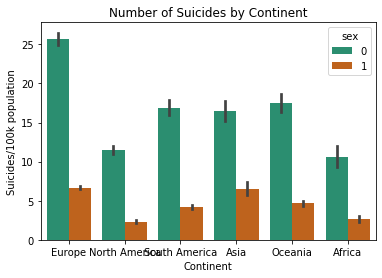

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=ndf, x='continent', y='suicides/100k pop', hue = 'sex', palette='Dark2')
plt.xlabel('Continent')
plt.ylabel('Suicides/100k population')
plt.title('Number of Suicides by Continent')
plt.show()

In [42]:
low_income_cutoff = 1000
middle_income_cutoff = 4000
high_income_cutoff = 12500
income_df = ndf[['country', 'year', 'continent', 'gdp_per_capita ($)', 'suicides/100k pop']]
income_df['income_group'] = pd.cut(income_df['gdp_per_capita ($)'], 
                                   bins=[0, low_income_cutoff, middle_income_cutoff, high_income_cutoff, float('inf')], 
                                   labels=['low', 'middle_lower', 'middle_upper', 'high'])
low_income_countries = income_df[income_df['income_group'] == 'low']['country'].unique()
middle_lower_income_countries = income_df[income_df['income_group'] == 'middle_lower']['country'].unique()
middle_upper_income_countries = income_df[income_df['income_group'] == 'middle_upper']['country'].unique()
high_income_countries = income_df[income_df['income_group'] == 'high']['country'].unique()

C:\Users\SKM\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [43]:
mean_suicide_rates = income_df.groupby('income_group')['suicides/100k pop'].mean()

In [44]:
mean_suicide_rates

income_group
low             11.060749
middle_lower    12.824966
middle_upper    10.692424
high            12.953569
Name: suicides/100k pop, dtype: float64

In [45]:
ndf.columns

Index(['Unnamed: 0', 'country', 'year', 'sex', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation', 'age_group', 'continent', 'suicides/100k pop mean',
       'male', 'female', 'ratio'],
      dtype='object')

------------

In [46]:
df1 = ndf

In [47]:
gen={0:'Generation X', 1:'Silent', 2:'G.I. Generation',3:'Boomers',
       4:'Millenials', 5:'Generation Z'}
df1['generation'].replace(gen,inplace=True)

In [48]:
gen_df = df1[['generation', 'suicides/100k pop']]


In [49]:
gen_means = gen_df.groupby('generation').mean()

In [50]:
df2 = gen_means.reset_index()

In [51]:
gen_means['suicides/100k pop']['Generation X']

9.425240417980191

In [52]:
gen_means_df = df.groupby('generation').mean()['suicides/100k pop']

## --------TESTING----------

In [53]:
import pandas as pd
import scipy.stats as stats
f_val, p_val = stats.f_oneway(*[df[df['generation']==gen]['suicides/100k pop'] for gen in gen_means_df.index])
print('F-value:', f_val)
print('P-value:', p_val)

F-value: 437.8845966537154
P-value: 0.0


In [54]:
con_means_df = ndf.groupby('continent').mean()['suicides/100k pop']

In [55]:
con_means_df

continent
Africa            6.617775
Asia             11.483538
Europe           16.187772
North America     6.889286
Oceania          11.068231
South America    10.563568
Name: suicides/100k pop, dtype: float64

In [56]:
f_val, p_val = stats.f_oneway(*[ndf[ndf['continent']==gen]['suicides/100k pop'] for gen in con_means_df.index])
print('F-value:', f_val)
print('P-value:', p_val)

F-value: 184.27868898897304
P-value: 5.4127760169352904e-194
